# LATTES CV QUANTITATIVE ANALYSIS

This notebook imports the Lattes CVs collection and performs a data clustering analytic method based on the premise that there are mean publication profiles to be found in this Lattes CV collection.

The first line of code imports the LattesLab Python library to be used by the notebook.

In [1]:
import LattesLab as ll

Now, the address of the folder containing the Lattes CVs is passed to the variable "folder".

In [2]:
folder= "D:\\thiag\\Documents\\INPE\\Research\\Datasets\\DoutoresEngenharias\\Eng2\\"

Now that the folder is known, the dataframe with the Lattes CVs information for this analysis can be retrieved from the CV files in the folder.

The second line of the cell below saves the original dataframe for further reference, if needed.

The first lines of the dataframe are exhibited two cells below.

In [3]:
lattesframe = ll.get_dataframe_from_folders(folder, True)

cleandata = lattesframe

In [4]:
lattesframe.head()

,Nome,lattesId,nacionalidade,atualizado,quantasVezesPIBIC,anoPrimeiroPIBIC,quantasGrad,anoPrimeiraGrad,quantosM,anoPrimeiroM,...,papers2008,papers2007,papers2006,papers2005,papers2004,papers2003,papers2002,papers2001,papers2000,papers1999
0,Mariany Ludgero Maia Gomes,3950347307650444,BRA,06042017,5,2010,1,2011,1,2018,...,0,0,0,0,0,0,0,0,0,0
1,Ricardo Alberto Coppola Germanos,8317381769715323,BRA,03012017,0,0,1,2021,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Marcia Terezinha Longen Zindel,9616386732062768,BRA,07102016,0,0,1,1993,1,1997,...,0,1,0,0,0,0,0,0,0,0
3,Paulo Barbosa,1872331555116110,Unspecified,27012003,0,0,0,0,1,1986,...,0,0,0,0,0,0,1,2,0,0
4,Mário César Giacco Ramos,8503701047948796,BRA,18032017,0,0,0,0,1,2002,...,0,0,0,2,1,0,1,0,0,0


Since the range of the Lattes CVs publications may vary, it is interesting to perform a filter of the dataframe by the publications between two given dates.

In [5]:
refdate1 = ''
refdate2 = ''
lattesframe = ll.filter_by_date(lattesframe, refdate1, refdate2)

Upper-limit date invalid. Using default date of today.
Lower-limit date invalid. Using default date of 01/01/1900.


It may also be interesting to survey how old the Lattes CVs are. For that, the function lattes_age generates a histogram of the Lattes CV collection age. It is possible to give a reference date (for example, the date when the Lattes CVs were obtained).

Date format invalid. Using todays date as reference.


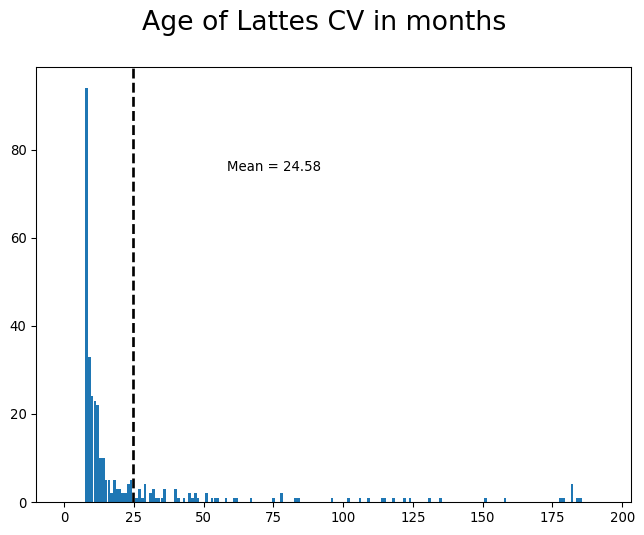

In [6]:
refdate3 = ''
ll.lattes_age(lattesframe, refdate3)

What if we survey how many of the researchers have received a Scientific Initiation scholarship? The function lattes_pibics returns a histogram of the quantity of scholarships received in the group of researchers of the Lattes CV owners.

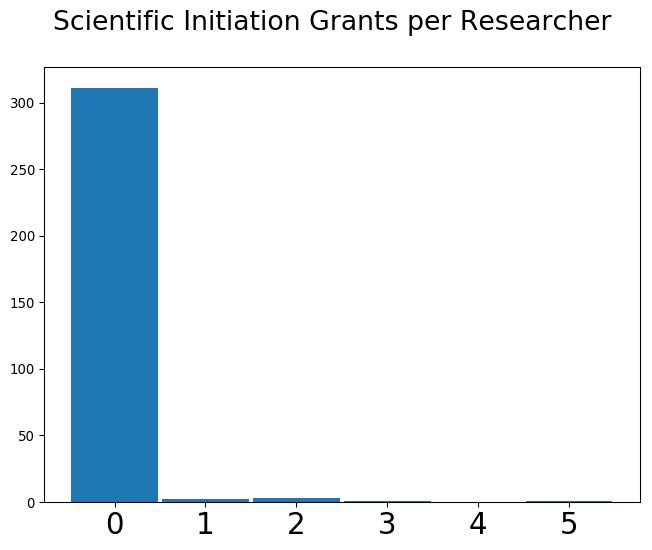

In [7]:
ll.lattes_pibics(lattesframe)

It is also possible to quantify the number of degrees granted per year with the function degree_rate_year. For this function:
1. The first parameter is the dataframe used to generate the histogram.
2. The second parameter is the degree desired:

    g: for Graduation
    
    m: for Master's
    
    d: for Doctorate / PhD
    
    pd: for Post-Doctorate

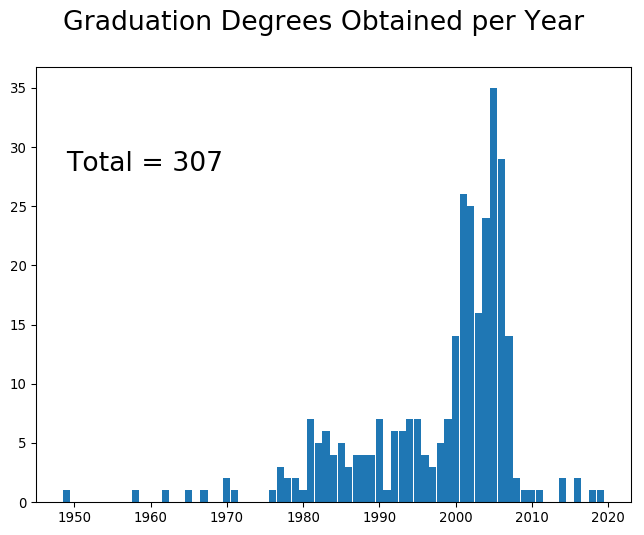

In [8]:
ll.degree_rate_year(lattesframe, 'g')

The function lattes_grad_level verifies within the dataframe what is the highest degree earned by each researcher.

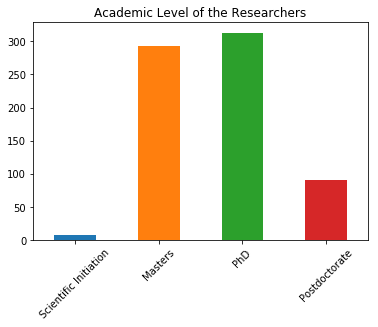

In [9]:
ll.lattes_grad_level(lattesframe)

The original dataframe contains data that is not needed to analyze the publication data per year and verify the existence of mean publication profiles. To trim the data for this analysis, the function get_pub_year_data is used and the first lines of the resulting dataframe are exhibited.

In [10]:
pubdata = ll.get_pub_year_data(lattesframe)

In [11]:
pubdata.head()

,year,year2,year3,year4,year5,year6,year7,year8,year9,year10,year11,year12,year13,year14,year15,year16,year17,year18,year19,year20
0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,1,1,4,0,0
1,0,0,0,0,0,2,1,3,1,2,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,2,3,4,0,4,1,0,0,0
3,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,4,1,3,3,2,3,3,5,1,1,0,5,1,0,0,0,0


This data may also be modified to accomodate the desired analysis. As it is presented, the data shows the quantity of papers and works published by a given researcher on a given year. Depending on the range of years of the dataframe, some comparisons may not be feasible: for example, comparing two researchers that were not producing at the same time interval. Therefore, the function first_nonzero helps to make the dataframe more suitable to a given analysis.


The first parameter of the function is the 'pubdata' dataframe above, the second parameter is the column of the raw dataframe that contains the year when the researchers obtained their first Scientific Initiation Scholarship and the third is the parameter that controls how the publishing data is formatted:
- If option=0: analysis is based on calendar year, which leaves the frame unchanged.
- If option=1: first production value is first non-zero value of the pubdata vector. The last vector indexes are substituted by zeros.
- If option=2: first production year is first year of Scientific Initiation scholarship. Only make sense to use it in Scientific Initiation-based dataframes.

In [12]:
ll.first_nonzero(pubdata, lattesframe['anoPrimeiroPIBIC'], 0)

In possession of the trimmed publication dataframe, the function set_fuzzycmeans_clstr is called, so that the Fuzzy C Means analysis is conducted. For more information on Fuzzy C Means, visit:

https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/cmeans.html


The arguments of the function are, in order of input:

- imin: minimum number of clusters (in this analysis, a cluster is a mean publication profile).
- imax: maximum number of clusters.
- cleandata: the dataframe with the publication data. To preserve the original dataframe, a new variable 'cleandata' (with the contents of the variable 'pubdata') was created.

Analysis with all available data.


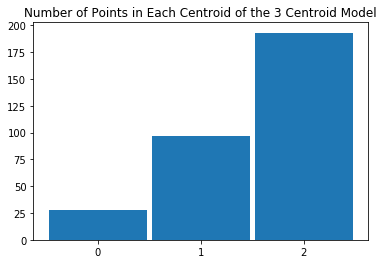

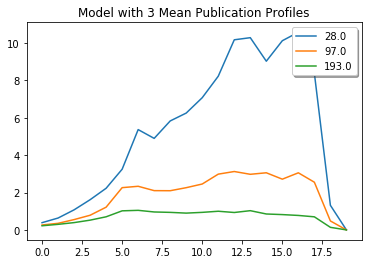

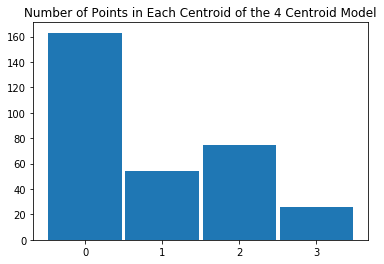

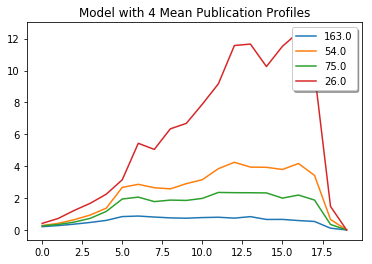

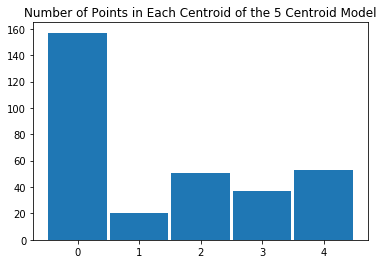

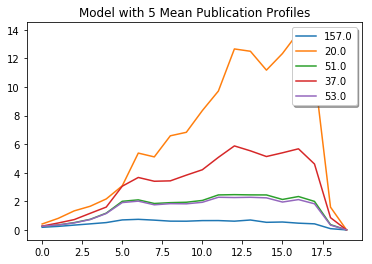

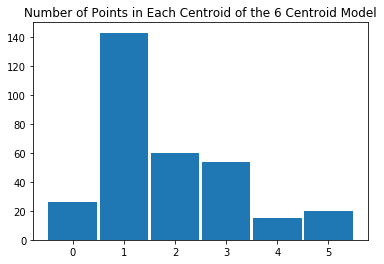

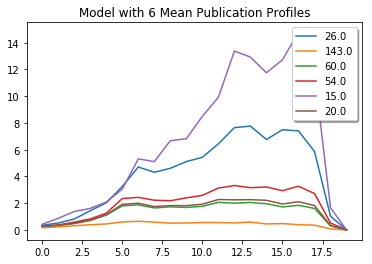

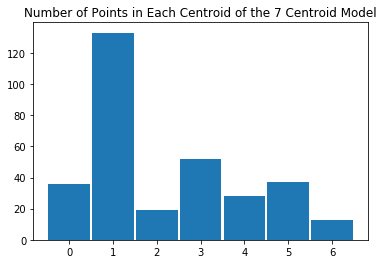

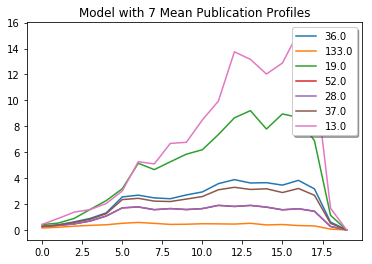

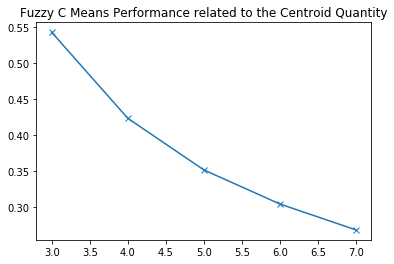

In [13]:
cleandata = pubdata
imin = 3
imax = 8
fpcs = []
centers = []
clusters = []

print('Analysis with all available data.')

centers, clusters, fpcs = ll.set_fuzzycmeans_clstr(imin, imax, cleandata)

From the results above it is possible to see that a quantity of the researchers found in this dataframe have zero publications. We may repeat the analisys removing these researchers from the data.

The call 'cleandata2 = cleandata[cleandata.sum(axis=1)!=0]' filters the researchers that have the sum of the yearly production throghout the years as different from zero. Therefore, if the sum is zero for a given researcher, this researcher will not be part of this dataframe.

Analysis with all researchers that have published at least once.


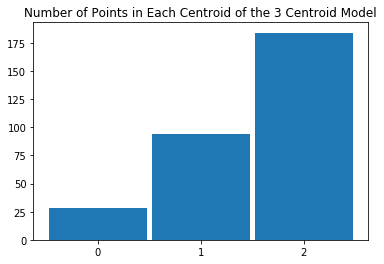

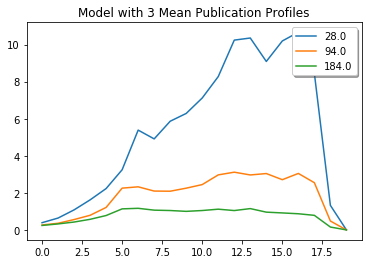

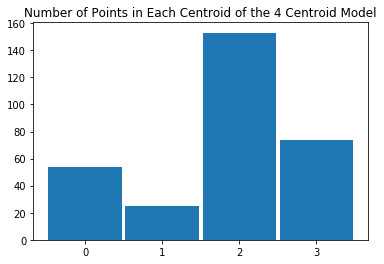

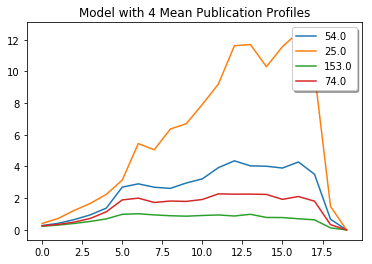

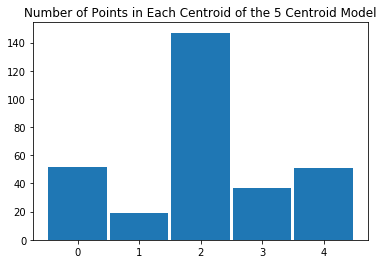

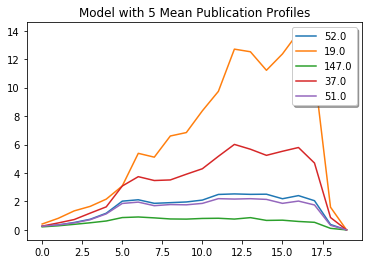

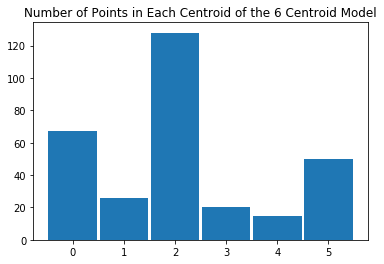

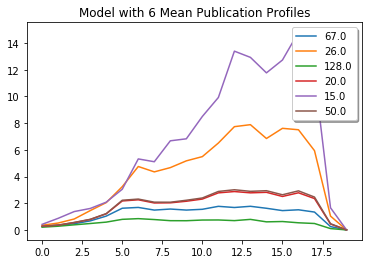

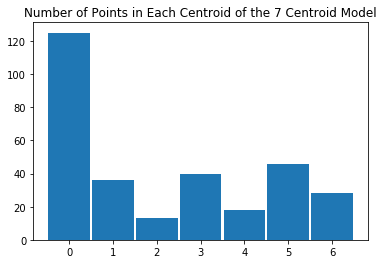

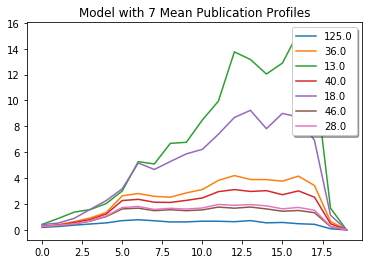

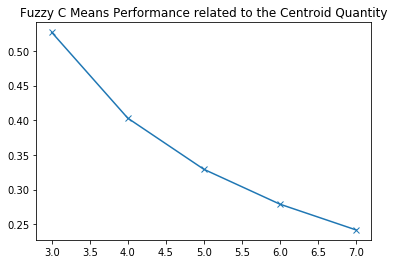

In [14]:
print('Analysis with all researchers that have published at least once.')
cleandata2 = cleandata[cleandata.sum(axis=1)!=0]
fpcs2 = []
centers2 = []
clusters2 = []

centers2, clusters2, fpcs2 = ll.set_fuzzycmeans_clstr(imin, imax, cleandata2)